In [237]:
import plotly.express as px
import os
import geopandas as gpd
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
import folium
from openrouteservice import client
from shapely import geometry
from shapely.geometry import shape, Polygon, mapping, MultiPolygon, LineString, Point
from shapely.ops import cascaded_union, transform
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
import pandas as pd
import os
from geopy.distance import distance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et
from random import uniform
from folium.plugins import TimestampedGeoJson
import overpy
import requests
import json
import rtree.index
from math import radians, cos, sin, asin, sqrt
import pyproj
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
import nltk
from shapely.geometry import Point
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import re
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import geopy
import xgboost as xgb
from xgboost import XGBRegressor
from scipy import stats
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariapopova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariapopova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [121]:
df = pd.read_csv('train.csv')

In [145]:
df.describe()

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,price
count,5.181500e+04,5.181500e+04,51815.000000,51815.000000,51815.000000,51812.000000,51796.000000,51743.000000,15.000000,33897.000000,38364.000000,51815.000000,51815.000000,51815.000000,51815.000000
mean,2.238119e+07,8.122630e+07,51.509058,-0.127937,3.225089,1.294227,1.399027,1.773438,991.133333,192.249019,42.472891,1.561401,7.052359,3.959548,115.015787
std,4.648209e+06,6.712667e+07,0.045575,0.092781,2.002458,0.620269,0.907317,1.224066,933.178965,310.090851,44.525508,1.282639,13.353841,13.994390,201.599587
min,1.278600e+05,4.775000e+03,51.294794,-0.501305,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.874920e+07,2.049720e+07,51.486162,-0.187733,2.000000,1.000000,1.000000,1.000000,242.000000,0.000000,15.000000,1.000000,0.000000,1.000000,45.000000
50%,2.235012e+07,6.358767e+07,51.513346,-0.126478,2.000000,1.000000,1.000000,1.000000,753.000000,100.000000,30.000000,1.000000,0.000000,2.000000,80.000000
75%,2.655883e+07,1.362233e+08,51.535516,-0.070239,4.000000,1.500000,2.000000,2.000000,1600.000000,250.000000,60.000000,2.000000,10.000000,3.000000,135.000000
max,2.979850e+07,2.241824e+08,51.679199,0.285395,20.000000,14.000000,12.000000,16.000000,3000.000000,4098.000000,614.000000,30.000000,235.000000,1125.000000,13700.000000


In [120]:
df['price'][df['price']  125].count()

SyntaxError: invalid syntax (<ipython-input-120-b7c96a2638b8>, line 1)

In [38]:
#fig = px.histogram(df, x="price")
#fig.show()

In [39]:
#fig = px.box(df, x="price")
#fig.show()

In [225]:
def preprocessing(df, MODE):
    center = Point((-0.1424,51.5023), 4326)
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    gdf = df.select_dtypes(include=numerics)
    newdf = gpd.GeoDataFrame(
    gdf, geometry = gpd.points_from_xy(x=gdf.longitude, y=gdf.latitude)
    )
    column_means = newdf.median()
    newdf = newdf.fillna(column_means)
    newdf["bathrooms"] = newdf["bathrooms"].astype(float).astype(int)
    newdf["bedrooms"] = newdf["bedrooms"].astype(float).astype(int)
    newdf["beds"] = newdf["beds"].astype(float).astype(int)
    newdf["extra_people"] = newdf["extra_people"].astype(float).astype(int)
    newdf = newdf.drop(['id','latitude','longitude','host_id', 'square_feet'], axis = 1)
    newdf['london'] = 0
    for index, row in newdf.iterrows():
        newdf.loc[index,'london'] = haversine(center.x,center.y,row['geometry'].x,row['geometry'].y)
        #if istance(center, row['geometry']) > 5 and center.distance(row['geometry']) < 15 :
        #    newdf.loc[index,'london'] = 2
        #if distance(center,row['geometry']) > 15 and center.distance(row['geometry']) < 30 :
        #    newdf.loc[index,'london'] = 3
        #if row['geometry'].within(afg.geometry[1]) == True:
            #newdf.loc[index,'london'] = 2
    #ss = StandardScaler()
    #newdf = pd.DataFrame(ss.fit_transform(newdf[['london'])
    newdf = newdf.drop(['geometry'], axis = 1)
    if MODE == 'train':
        newdf = newdf[newdf['price'] > 0]
        #newdf = newdf[newdf['price'] < s]
        #y = newdf['price']
        sns.heatmap(newdf.corr())
        #newdf = newdf.drop(['price',], axis = 1)
        return newdf
    return newdf
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a)) 
    r = 6371
    return c * r
#newdf, y = preprocessing(df,'train', 150)
    #distance += haversine(final_point.y, final_point.x, atm_coordinates[i][1], atm_coordinates[i][0])

In [ ]:
    newdf['london'] = 7
    for index, row in newdf.iterrows():
        #newdf.loc[index,'london'] = haversine(center.x,center.y,row['geometry'].x,row['geometry'].y)
        if haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) < 2:
            newdf.loc[index,'london'] = 1
        if haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) > 2 and haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) < 5:
            newdf.loc[index,'london'] = 2
        if haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) > 5 and haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) < 7:
            newdf.loc[index,'london'] = 3
        if haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) > 7 and haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) < 10:
            newdf.loc[index,'london'] = 4
        if haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) > 10 and haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) < 20:
            newdf.loc[index,'london'] = 5
        if haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) > 20 and haversine(center.x,center.y,row['geometry'].x,row['geometry'].y) < 50:
            newdf.loc[index,'london'] = 

5 98.40885663394185
55 50.19319017557148
105 41.89888813338055
155 43.077899746050726
205 45.310051693790335
255 46.92017444454223
305 48.07594908311682
355 48.826564554244804
405 49.626457469910044
455 50.22569734570407
505 50.72116567026676
555 50.939206299601445
605 51.20096044856265
655 51.29480810180445
705 51.426134833799296
755 51.749997352835365
805 51.83270109000983
855 51.84365464181136
905 51.893247945811346
955 51.919654083004055


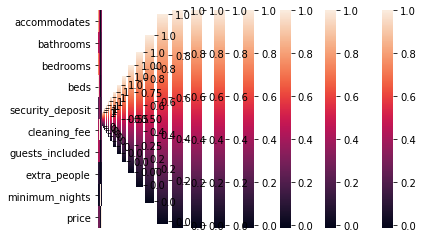

In [196]:
for s in range (5,1000,50):
    new = preprocessing(df, 'train')
    X_train, X_test = train_test_split(new, test_size=0.2, random_state=0)
    X_train = X_train[X_train['price'] < s]
    y_train = X_train['price']
    X_train = X_train.drop(['price',], axis = 1)
    X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
    X_test = X_test[X_test['price'] > 0]
    y_test = X_test['price']
    X_test = X_test.drop(['price',], axis = 1)
#X_train, y_train = np.array(train_full), np.array(y)
#X_test, y_test = np.array(test_full), np.array(test_full['price'])
    logisticRegr = LinearRegression()
    logisticRegr.fit(X_train, y_train)
    y_pred = logisticRegr.predict(X_test)
    print (s, mean_absolute_percentage_error(y_test,y_pred))

In [205]:
logisticRegr.coef_

array([157.43828424, -54.19532169, -16.96265395, -45.29837968,
        25.02639135, 163.70485813,  22.36027524,  -2.27582102,
       -34.58805749, -43.2753418 ])

In [149]:
res = []
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#for j in range (1,1000,1):
#    y_pred = pd.Series(j for i in range (len(y_test)))
#    res.append([j, mean_absolute_percentage_error(np.log2(y_test), np.log2(y_pred))])
print (mean_absolute_percentage_error)
#a = pd.DataFrame(res)
#sns.lineplot(data=a, x=a[0], y=a[1])

<function mean_absolute_percentage_error at 0x1a290e7ef0>


33.91602632484984


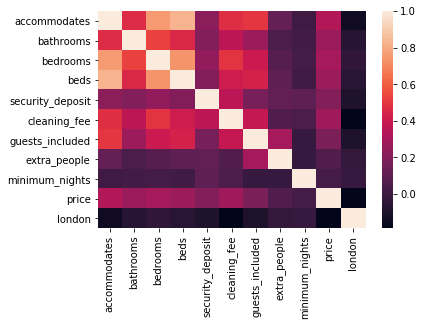

In [272]:
new = preprocessing(df, 'train')
X_train, X_test = train_test_split(new, test_size=0.2, random_state=0)
X_train = X_train[X_train['price'] < 120]
y_train = X_train['price']
X_train = X_train.drop(['price',], axis = 1)
X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
X_test = X_test[X_test['price'] > 0]
y_test = X_test['price']
X_test = X_test.drop(['price',], axis = 1)
min_max_scaler = MinMaxScaler()
X_train_ss = min_max_scaler.fit_transform(X_train)
X_test_ss = min_max_scaler.transform(X_test)
weight = round(1 / y_train, 2)
logisticRegr = XGBRegressor()
logisticRegr.fit(X_train_ss, y_train, sample_weight = weight)
y_pred = logisticRegr.predict(X_test_ss)
print (mean_absolute_percentage_error(y_test,y_pred))
    
#logisticRegr.coef_

In [271]:
logisticRegr.coef_

array([151.8144025 , -51.61887303, -11.4263377 , -62.62886727,
        30.55223651, 169.11848598,  46.39580488,   7.4099152 ,
       -49.11719763, -37.32063485])

In [257]:
ft_weights_xgb_reg = pd.DataFrame(logisticRegr.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
minimum_nights,0.019178
extra_people,0.025570
security_deposit,0.028022
beds,0.032316
bathrooms,0.039430
london,0.044304
guests_included,0.063392
bedrooms,0.074894
cleaning_fee,0.186063
accommodates,0.486832


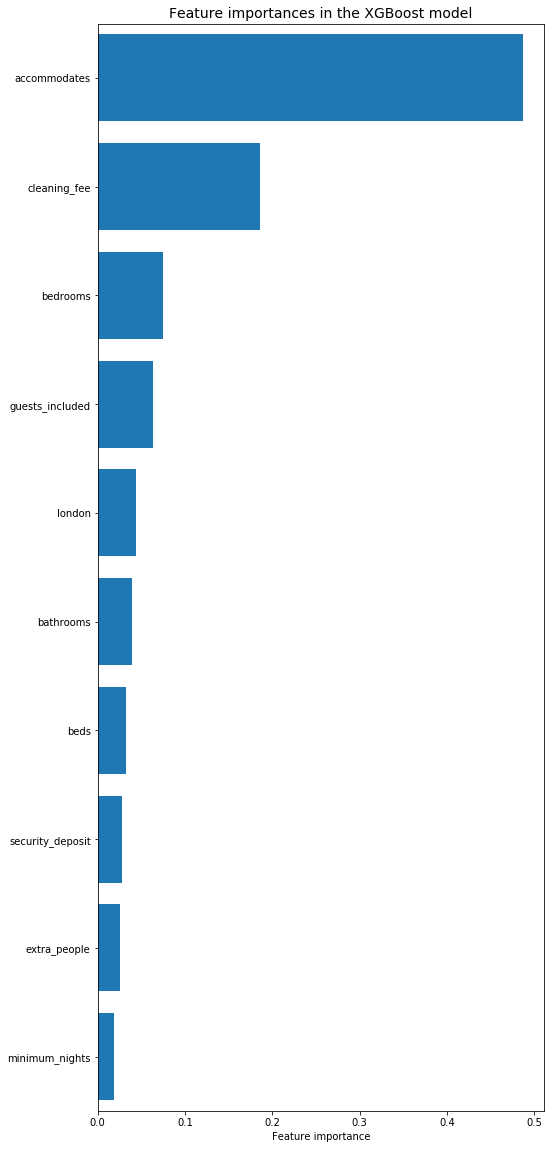

In [258]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [142]:
def mean_absolute_percentage_error1(y_pred, y_true, sample_weights=None):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    if np.any(y_true==0):
        print("Found zeroes in y_true. MAPE undefined. Removing from set...")
        idx = np.where(y_true==0)
        y_true = np.delete(y_true, idx)
        y_pred = np.delete(y_pred, idx)
        if type(sample_weights) != type(None):
            sample_weights = np.array(sample_weights)
            sample_weights = np.delete(sample_weights, idx)
        
    if type(sample_weights) == type(None):
        return(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    else:
        sample_weights = np.array(sample_weights)
        assert len(sample_weights) == len(y_true)
        return(100/sum(sample_weights)*np.dot(
                sample_weights, (np.abs((y_true - y_pred) / y_true))
        ))
    
loss_function = mean_absolute_percentage_error


In [ ]:
def objective_function(beta, X_train, y_train):
    error = loss_function(np.matmul(X,beta), Y)
    return(error)

# You must provide a starting point at which to initialize
# the parameter search space
beta_init = np.array([1]*X.shape[1])
result = minimize(objective_function, beta_init, args=(X,Y),
                  method='BFGS', options={'maxiter': 500})

# The optimal values for the input parameters are stored
# in result.x
beta_hat = result.x
print(beta_hat)

In [5]:
afg = gpd.read_file('lp-falp-2006-inner-outer-london.shp')

In [46]:
#for_sns = df[['price', 'guests_included','london']].iloc[:1000,:]
#sns.pairplot(for_sns)

In [7]:
afg_geo = gpd.GeoDataFrame(afg, geometry='geometry')

In [8]:
afg_geo = afg_geo.to_crs(epsg=4326)
inner = afg.geometry[0]
outer = afg.geometry[1]
afg_geo


,Designated,Source,Shape_Leng,Shape_Area,geometry
0,Inner,The London Plan consolidated with alterations ...,130298.412266,3.279628e+08,"POLYGON ((0.00760 51.50551, 0.00732 51.50563, ..."
1,Outer,The London Plan consolidated with alterations ...,386483.894147,1.266756e+09,"POLYGON ((0.21031 51.48588, 0.21106 51.48587, ..."


In [28]:
#api_key = '5b3ce3597851110001cf6248be341385645542d192bbcc7bfecd1e27'
#Создадим карту с центром в центральном парке
#clnt = client.Client(key=api_key) 
#school_coordinates = []
#myMap = folium.Map(location=([51.447147,-0.000000]), zoom_start=14)
#folium.GeoJson(afg.geometry[0]).add_to(myMap)
#for element in gdf.itertuples():
#        lon = element.longitude
#        lat = element.latitude
#        school_coordinates.append((lon, lat))
#for data in school_coordinates:
#    folium.Marker(list(reversed(data)), popup = "school").add_to(map1)      
#myMap

In [13]:
#gdf.plot(figsize=(10, 10), column = 'price', linewidth=0, legend=True)

In [259]:
df_test = pd.read_csv('test.csv')
df_test = preprocessing(df_test,'test')


In [260]:
df_test_ss = min_max_scaler.transform(df_test)

In [261]:
df_sample = pd.read_csv('sample_submission.csv')

In [262]:
df_sample['price'] = logisticRegr.predict(df_test_ss)

In [263]:
df_sample.to_csv('total.csv', header=True, index=False, encoding='utf-8')

In [264]:
df_sample.head()

,id,price
0,9554,34.351536
1,11076,59.689606
2,13913,37.243790
3,17402,86.653732
4,24328,99.640793
